# Python Client Example for Mapepire

This is a simple example that shows the usage of the mapipire Python client.

@author Adam Shedivy

## Install the package

In [ ]:
%pip install mapepire-python pandas matplotlib

In [17]:
import configparser
import pandas as pd
from mapepire_python.client.sql_job import SQLJob
from mapepire_python.data_types import DaemonServer

### Server Configuration

fill out `config.ini`` with the server configuration

```ini
[mapepire]
SERVER="SERVER"
PORT="PORT"
USER="USER"
PASSWORD="PASSWORD"
```

then run the following cell to load the configuration

In [18]:
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

## Connect to the mapipire server

- create a `DaemonServer` object with credentials
- create a `SQLJob`
- create a `Query` object
- run the query

In [19]:
creds = DaemonServer(
    host=config['mapepire']['SERVER'],
    port=config['mapepire']['PORT'],
    user=config['mapepire']['USER'],
    password=config['mapepire']['PASSWORD'],
    ignoreUnauthorized=True,
)

with SQLJob(creds) as job:
    with job.query('select * from sample.employee') as query:
        results = query.run(rows_to_fetch=1)
results

{'id': 'query3',
 'has_results': True,
 'update_count': -1,
 'metadata': {'column_count': 14,
  'job': '006132/QUSER/QZDASOINIT',
  'columns': [{'name': 'EMPNO',
    'type': 'CHAR',
    'display_size': 6,
    'label': 'EMPNO'},
   {'name': 'FIRSTNME',
    'type': 'VARCHAR',
    'display_size': 12,
    'label': 'FIRSTNME'},
   {'name': 'MIDINIT', 'type': 'CHAR', 'display_size': 1, 'label': 'MIDINIT'},
   {'name': 'LASTNAME',
    'type': 'VARCHAR',
    'display_size': 15,
    'label': 'LASTNAME'},
   {'name': 'WORKDEPT',
    'type': 'CHAR',
    'display_size': 3,
    'label': 'WORKDEPT'},
   {'name': 'PHONENO', 'type': 'CHAR', 'display_size': 4, 'label': 'PHONENO'},
   {'name': 'HIREDATE',
    'type': 'DATE',
    'display_size': 10,
    'label': 'HIREDATE'},
   {'name': 'JOB', 'type': 'CHAR', 'display_size': 8, 'label': 'JOB'},
   {'name': 'EDLEVEL',
    'type': 'SMALLINT',
    'display_size': 6,
    'label': 'EDLEVEL'},
   {'name': 'SEX', 'type': 'CHAR', 'display_size': 1, 'label': 'SEX

### Load the query results into a pandas dataframe

In [20]:
with SQLJob(creds) as job:
    with job.query('select * from sample.employee') as query:
        results = query.run(rows_to_fetch=10)
        df = pd.DataFrame(results['data'])
df.head()

,EMPNO,FIRSTNME,MIDINIT,LASTNAME,WORKDEPT,PHONENO,HIREDATE,JOB,EDLEVEL,SEX,BIRTHDATE,SALARY,BONUS,COMM
0,000010,CHRISTINE,I,HAAS,A00,3978,65/01/01,PRES,18,F,None,52750.0,1000.0,4220.0
1,000020,MICHAEL,L,THOMPSON,B01,3476,73/10/10,MANAGER,18,M,48/02/02,41250.0,800.0,3300.0
2,000030,SALLY,A,KWAN,C01,4738,75/04/05,MANAGER,20,F,41/05/11,38250.0,800.0,3060.0
3,000050,JOHN,B,GEYER,E01,6789,49/08/17,MANAGER,16,M,None,40175.0,800.0,3214.0
4,000060,IRVING,F,STERN,D11,6423,73/09/14,MANAGER,16,M,45/07/07,32250.0,500.0,2580.0


### Visualize the results

create a plot using the `matplotlib` library that displays the salary for each employee

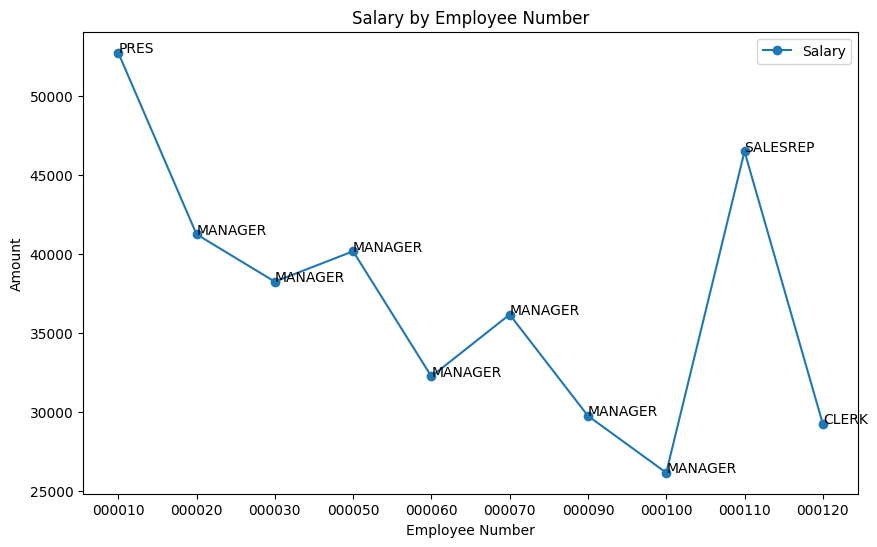

In [21]:
import matplotlib.pyplot as plt
# Create a new figure
plt.figure(figsize=(10,6))

# Plot salary and bonus against EMPNO
plt.plot(df['EMPNO'], df['SALARY'], '-o', label='Salary')

# Add labels for job titles and education level
for i, txt in enumerate(df['JOB']):
    plt.annotate(txt, (df['EMPNO'][i], df['SALARY'][i]))
for i, txt in enumerate(df['EDLEVEL']):
    plt.annotate(txt, (df['EMPNO'][i], df['BONUS'][i]))

# Add title and labels
plt.title('Salary by Employee Number')
plt.xlabel('Employee Number')
plt.ylabel('Amount')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Filter query results using Python

In [22]:
from typing import List

def filter_table(creds: DaemonServer, schema: str, table: str, columns: List[str]):
    with SQLJob(creds) as job:
        query_str = f"select {', '.join(columns)} from {schema}.{table}"
        with job.query(query_str) as query:
            results = query.run()
            return results
        
columns = ['EMPNO', 'SALARY', 'WORKDEPT']

filtered_data = filter_table(creds, schema='sample', table='employee', columns=columns)
filtered_df = pd.DataFrame(filtered_data['data'])
filtered_df

,EMPNO,SALARY,WORKDEPT
0,000010,52750.0,A00
1,000020,41250.0,B01
2,000030,38250.0,C01
3,000050,40175.0,E01
4,000060,32250.0,D11
5,000070,36170.0,D21
6,000090,29750.0,E11
7,000100,26150.0,E21
8,000110,46500.0,A00
9,000120,29250.0,A00


### Display the average salary for each department

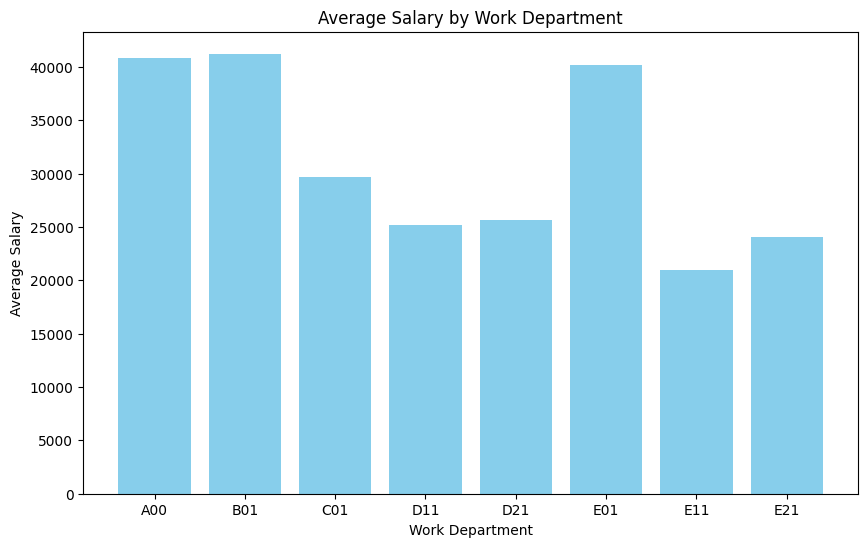

In [23]:
import matplotlib.pyplot as plt

# Calculate the average salary by work department
avg_salary_by_dept = filtered_df.groupby('WORKDEPT')['SALARY'].mean().reset_index()

# Create a new figure
plt.figure(figsize=(10,6))

# Plot average salary by work department
plt.bar(avg_salary_by_dept['WORKDEPT'], avg_salary_by_dept['SALARY'], color='skyblue')

# Add title and labels
plt.title('Average Salary by Work Department')
plt.xlabel('Work Department')
plt.ylabel('Average Salary')

# Show the plot
plt.show()

## Pooling 

use the `Pool` object to run multiple queries concurrently

In [24]:
import asyncio
from mapepire_python.pool.pool_client import Pool, PoolOptions

async with Pool(
    PoolOptions(
        creds=creds,
        max_size=3,
        starting_size=2,
        opts=None
    )
) as pool:
    
    tasks = await asyncio.gather(
        pool.execute('select * from sample.employee'),
        pool.execute('select * from sample.department')
    )
    
    for result in tasks:
        print(result['success'])
    


True
True


### Convert query results to a pandas dataframe

In [25]:
from typing import Any, Dict


employee_table = tasks[0]
dept_table = tasks[1]

def convert_table_to_df(table: Dict[str,Any]):
    assert table['success'] and table['has_results']
    return pd.DataFrame(table['data'])

employee_df = convert_table_to_df(employee_table)
dept_df = convert_table_to_df(dept_table)

employee_df.head()
    

,EMPNO,FIRSTNME,MIDINIT,LASTNAME,WORKDEPT,PHONENO,HIREDATE,JOB,EDLEVEL,SEX,BIRTHDATE,SALARY,BONUS,COMM
0,000010,CHRISTINE,I,HAAS,A00,3978,65/01/01,PRES,18,F,None,52750.0,1000.0,4220.0
1,000020,MICHAEL,L,THOMPSON,B01,3476,73/10/10,MANAGER,18,M,48/02/02,41250.0,800.0,3300.0
2,000030,SALLY,A,KWAN,C01,4738,75/04/05,MANAGER,20,F,41/05/11,38250.0,800.0,3060.0
3,000050,JOHN,B,GEYER,E01,6789,49/08/17,MANAGER,16,M,None,40175.0,800.0,3214.0
4,000060,IRVING,F,STERN,D11,6423,73/09/14,MANAGER,16,M,45/07/07,32250.0,500.0,2580.0


In [26]:
dept_df

,DEPTNO,DEPTNAME,MGRNO,ADMRDEPT,LOCATION
0,A00,SPIFFY COMPUTER SERVICE DIV.,000010,A00,None
1,B01,PLANNING,000020,A00,None
2,C01,INFORMATION CENTER,000030,A00,None
3,D01,DEVELOPMENT CENTER,None,A00,None
4,D11,MANUFACTURING SYSTEMS,000060,D01,None
5,D21,ADMINISTRATION SYSTEMS,000070,D01,None
6,E01,SUPPORT SERVICES,000050,A00,None
7,E11,OPERATIONS,000090,E01,None
8,E21,SOFTWARE SUPPORT,000100,E01,None
9,F22,BRANCH OFFICE F2,None,E01,None


### Merge the department and employee dataframes

In [27]:
# Join the department DataFrame with the employee DataFrame on the WORKDEPT column
merged_df = pd.merge(employee_df, dept_df, left_on='WORKDEPT', right_on='DEPTNO', how='left')

# Display the resulting DataFrame
merged_df.head()

,EMPNO,FIRSTNME,MIDINIT,LASTNAME,WORKDEPT,PHONENO,HIREDATE,JOB,EDLEVEL,SEX,BIRTHDATE,SALARY,BONUS,COMM,DEPTNO,DEPTNAME,MGRNO,ADMRDEPT,LOCATION
0,000010,CHRISTINE,I,HAAS,A00,3978,65/01/01,PRES,18,F,None,52750.0,1000.0,4220.0,A00,SPIFFY COMPUTER SERVICE DIV.,000010,A00,None
1,000020,MICHAEL,L,THOMPSON,B01,3476,73/10/10,MANAGER,18,M,48/02/02,41250.0,800.0,3300.0,B01,PLANNING,000020,A00,None
2,000030,SALLY,A,KWAN,C01,4738,75/04/05,MANAGER,20,F,41/05/11,38250.0,800.0,3060.0,C01,INFORMATION CENTER,000030,A00,None
3,000050,JOHN,B,GEYER,E01,6789,49/08/17,MANAGER,16,M,None,40175.0,800.0,3214.0,E01,SUPPORT SERVICES,000050,A00,None
4,000060,IRVING,F,STERN,D11,6423,73/09/14,MANAGER,16,M,45/07/07,32250.0,500.0,2580.0,D11,MANUFACTURING SYSTEMS,000060,D01,None


### Create new plot with Department names

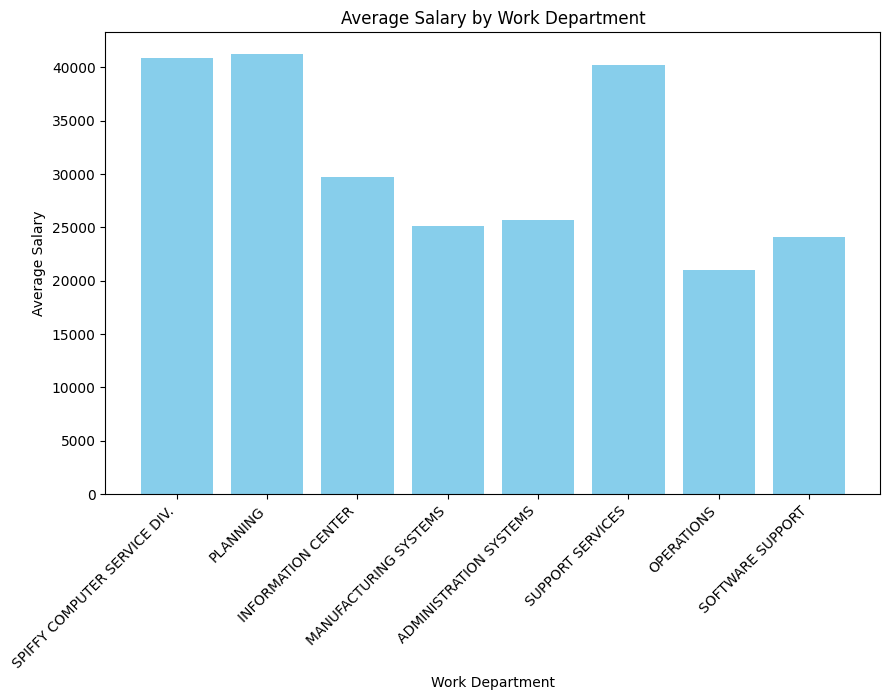

In [28]:
import matplotlib.pyplot as plt

# Calculate the average salary by work department
avg_salary_by_dept = merged_df.groupby(['DEPTNAME', 'DEPTNO'])['SALARY'].mean().reset_index().sort_values(by='DEPTNO')

# Create a new figure
plt.figure(figsize=(10,6))

# Plot average salary by work department
plt.bar(avg_salary_by_dept['DEPTNAME'], avg_salary_by_dept['SALARY'], color='skyblue')

# Add title and labels
plt.title('Average Salary by Work Department')
plt.xlabel('Work Department')
plt.ylabel('Average Salary')

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()